# Introduction to Regression with Neural Network in TensorFlow

There are many definitions for a regression problem but in our case we are going to simplyfy it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [42]:
# import TensorFlow
import tensorflow as tf
print(tf.__version__)

# tf.config.set_visible_devices('GPU')
tf.config.list_physical_devices()

2.11.0


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [43]:
tf.config.set_visible_devices([],'GPU')

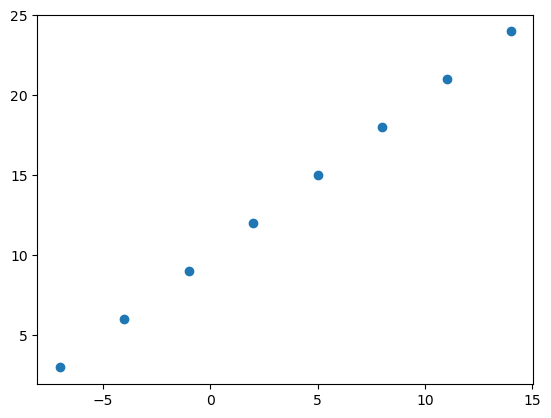

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# create futures
X = np.array([-7.0, -4.0, -1.0, 2.0,5.0,8.0,11.0,14.0])
y = np.array([3,6,9,12,15,18,21,24.0])

plt.scatter(X,y)

In [45]:
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [46]:
input_shape =X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

### steps in Modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a mdel - letting the model try to find patterns between X & y (features and labels).

In [47]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [48]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae')

# 3. Fit the Model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 135ms/step - loss: 8.8725
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 8.8583
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 8.8479
Epoch 4/5
1/1 [==============================] - 0s 1ms/step - loss: 8.8393
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 8.8316


In [49]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [50]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 26ms/step


array([[22.668137]], dtype=float32)

In [51]:
y_pred+11

array([[33.668137]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number oh hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or peerhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [67]:
# Lets re-build our model
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

# 3. Fit the Model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 236ms/step - loss: 13.9408 - mae: 13.9408
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 13.1950 - mae: 13.1950
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 12.4517 - mae: 12.4517
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 11.7103 - mae: 11.7103
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9695 - mae: 10.9695
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.2274 - mae: 10.2274
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 9.4823 - mae: 9.4823
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 8.7323 - mae: 8.7323
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 7.9751 - mae: 7.9751
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 7.2081 - mae: 7.2081
Epoch 11/100
1/1 [==============================] - 0s 2ms/step -

In [68]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 31ms/step


array([[26.829416]], dtype=float32)

### Evalutaing a model

In practice a typical workflow you will go theough when building neural networks
> `Build a model -> fit it -> evaluate it -> tweak a model -> fit it ->  evaluate it...`

when it comes to evaluaition... there are 3 words you should memorize:
> "Visualize, Visualize, Visualize,"

its good idea to visualize:

 * The data - what data are we working with? What does it look like?
 * The model it self - what does our model look like?
 * The training of model - how does model perform while it learns?
 * The prediction of the model - how do the predictions of model line up against the ground truth (original labels)?

In [69]:
#  make a bigger data
X = tf.range(-100, 100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [70]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

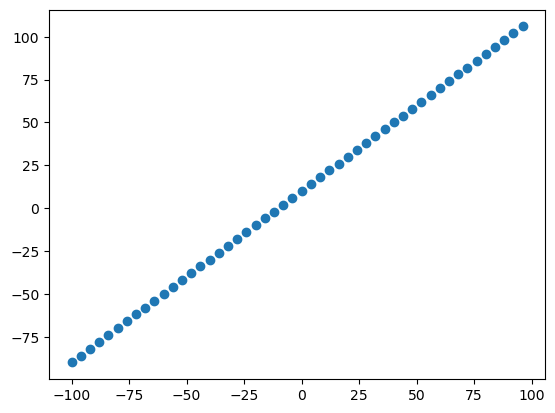

In [71]:
# visualize data
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train,y_train)

